<div dir='rtl'>
    <h1>
     تمرین عملی پنجم
    </h1>
</div>
    

In [49]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
print("Number of features : ", len(x[0]),"\nNumber of classes : ", len(set(y)), "\nNumber of data :", len(y))

Number of features :  4 
Number of classes :  3 
Number of data : 150


<div dir='rtl'>
<h2>Perceptron</h2>
    داده‌ها با کلاس ۱ و ۰ را در نظر می‌گیریم. همانطور که می‌بینیم داده‌ها خطی جدایی پذیرند و در iteration دوم تعداد نقاط misclassified به صفر رسیده است. و دقت روی داده تست نیز ۱۰۰ درصد است!
</div>

In [7]:
def find_train_test(x, y):
    idx = np.random.permutation(x.shape[0])
    train_idx, test_idx = idx[:int(0.8 * x.shape[0])], idx[int(0.8 * x.shape[0]):]
    x_train, x_test = x[train_idx,:], x[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    return x_train, x_test, y_train, y_test

def normalize_data(x):
    x = x - x.mean(axis=0)
    return x / np.abs(x).max(axis=0)


In [8]:
y_perceptron = y[0:100]
x_perceptron = x[0:100]
x_train_p, x_test_p, y_train_p, y_test_p = find_train_test(x_perceptron, y_perceptron)

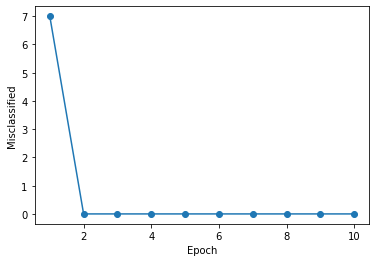

[ 0.8  5.1 -7.1 -2.6]


In [11]:
def perceptron_predict(x, w):
    if np.dot(x, w) >= 0:
        return 1
    return -1

def perceptron_train(x, y, max_iter=100):
    w = np.zeros(x.shape[1])
    miss_classified = []
    for j in range(max_iter):
        count = 0
        for i in range(len(x)):
            predict = perceptron_predict(x[i], w)
            if y[i] == predict:
                continue
            w += x[i] * y[i]
            count += 1
        miss_classified.append(count)
    plt.plot(range(1, len(miss_classified) + 1), miss_classified, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    return w
    
    
y_train_prime = []   
for i in y_train_p:
    if i == 0:
        y_train_prime.append(1)
    else:
        y_train_prime.append(-1)
w = perceptron_train(x_train_p, y_train_prime, 10)

In [12]:
y_test_prime = []   
for i in y_test_p:
    if i == 0:
        y_test_prime.append(1)
    else:
        y_test_prime.append(-1)
predict = []
true = 0
for i in range(len(x_test_p)):
    if perceptron_predict(x_test_p[i], w) == y_test_prime[i]:
        true += 1
print("Accuracy on test data:", true / len(x_test_p))

Accuracy on test data: 1.0


<div dir='rtl'>
<h2> Logistic Regression</h2>
    از آنجایی که چند کلاس داریم از روش one vs all استفاده کردم. برای اینکار ابتدا y را به شکل one-hot تغییر دادم. حال به ازای هرکلاس یک دسته‌بندی دودویی انجام می‌دهیم.
</div>

In [21]:
x = normalize_data(x)
y_prime = np.zeros((y.size, y.max()+1))
y_prime[np.arange(y.size),y] = 1
x_train, x_test, y_train, y_test = find_train_test(x, y_prime)
print("test train spilit : \n train: ", x_train.shape[0], "\n test: ", x_test.shape[0])

test train spilit : 
 train:  120 
 test:  30


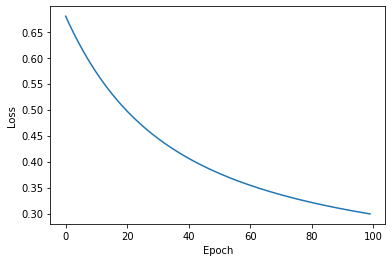

In [91]:
def sigmoid(a):
    return 1/(1+ np.exp(-1 * a))


def cost_function(x, y, w):
    t = sigmoid(x.dot(w))
    cost = 0
    for i in range(len(x)):
        for j in range(3):
            cost +=  y[i, j] * np.log(t[i, j])
    return (-1/len(x)) * cost


def train(x, y, max_iter=100, alpha=0.1):
    n = len(y)
    w = np.zeros([x.shape[1], y.shape[1]])
    cost = []
    for i in range(max_iter):
        for j in range(len(y[0])):
            h = sigmoid(np.dot(x, w[:,j]))
            for k in range(0, w.shape[0]):
                w[k, j] -= (alpha/n) * np.sum((h - y[:, j]) * x[:, k])
        cost.append(cost_function(x, y, w))
    plt.plot([i for i in range(max_iter)], cost)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    return w, cost


w, cost = train(x_train, y_train)

In [62]:
def predict(x, w):
    pred = []
    for i in range(3):
        h = sigmoid(np.dot(x, w[:,i]))
        pred.append(h)
    pred = np.array(pred).transpose()
    res = []
    for p in pred:
        x = [0, 0, 0]
        x[np.argmax([i for i in p])] += 1
        res.append(x)
    return res
    
def accuracy(y_test, y_predict):
    acc = np.zeros((3, 3))
    for i in range(len(y_test)):
        main = np.argmax(y_test[i])
        pred = np.argmax(y_predict[i])
        acc[main][pred] += 1
    return acc

y_predict = predict(x_test, w) 
confusion_matrix = accuracy(y_test, y_predict)

df={}
df['0_label']= confusion_matrix[0]
df['1_label']= confusion_matrix[1]
df['2_label']= confusion_matrix[2]
print("Confusion matrix for test set: ")
pd.DataFrame(df)

Confusion matrix for test set: 


,0_label,1_label,2_label
0,7.0,0.0,0.0
1,0.0,3.0,0.0
2,0.0,9.0,11.0


Confusion matrix for test set (l2 = 0.1): 
   0_label  1_label  2_label
0      7.0      0.0      0.0
1      0.0      6.0      1.0
2      0.0      6.0     10.0
Confusion matrix for test set(l2 = 1): 
   0_label  1_label  2_label
0      7.0      3.0      0.0
1      0.0      3.0      1.0
2      0.0      6.0     10.0
Confusion matrix for test set (l2 = 10): 
   0_label  1_label  2_label
0      7.0      0.0      0.0
1      0.0      6.0      1.0
2      0.0      6.0     10.0


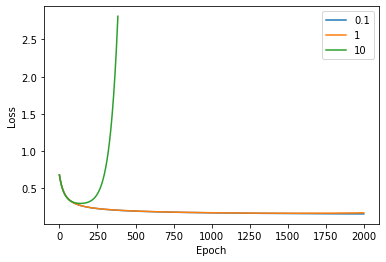

In [90]:
def train_2(x, y, l2, max_iter, alpha=0.1):
    n = len(y)
    w = np.zeros([x.shape[1], y.shape[1]])
    cost = []
    for i in range(max_iter):
        for j in range(len(y[0])):
            h = sigmoid(np.dot(x, w[:,j]))
            for k in range(w.shape[0]):
                w[k, j] -= (alpha / n) * (np.sum((h - y[:, j]) * x[:, k]) + l2 * np.linalg.norm(w[:, j]))
        cost.append(cost_function(x, y, w))
    return w, cost

max_iter = 2000
w_2, cost_2 = train_2(x_train, y_train, 0.1, max_iter)
y_predict_2 = predict(x_test, w_2)    
confusion_matrix_2 = accuracy(y_test, y_predict_2)

df_2={}
df_2['0_label']= confusion_matrix_2[0]
df_2['1_label']= confusion_matrix_2[1]
df_2['2_label']= confusion_matrix_2[2]
print("Confusion matrix for test set (l2 = 0.1): ")
print(pd.DataFrame(df_2))

w_3, cost_3 = train_2(x_train, y_train, 1, max_iter)
y_predict_3 = predict(x_test, w_3)    
confusion_matrix_3 = accuracy(y_test, y_predict_3)

df_3={}
df_3['0_label']= confusion_matrix_3[0]
df_3['1_label']= confusion_matrix_3[1]
df_3['2_label']= confusion_matrix_3[2]
print("Confusion matrix for test set(l2 = 1): ")
print(pd.DataFrame(df_3))

w_4, cost_4 = train_2(x_train, y_train, 10, max_iter)
y_predict_4 = predict(x_test, w_4)    
confusion_matrix_4 = accuracy(y_test, y_predict_4)

df_4={}
df_4['0_label']= confusion_matrix_2[0]
df_4['1_label']= confusion_matrix_2[1]
df_4['2_label']= confusion_matrix_2[2]
print("Confusion matrix for test set (l2 = 10): ")
print(pd.DataFrame(df_4))
plt.plot([i for i in range(max_iter)], cost_2, label="0.1")
plt.plot([i for i in range(max_iter)], cost_3, label="1")
plt.plot([i for i in range(max_iter)], cost_4, label="10")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div dir='rtl'>
   دیدیم که در قسمت اول که regulaizer نداشتیم ۹ داده‌ی دسته‌ی ۱ به اشتباه دسته ۲ تلقی شده بودند. حال با گذاشتن l2 norm در گرادیان می‌بینیم که تعداد کل misclassified ها از 9 به 7 کاهمش میابد ( در l2 = 0.1 , l2= 10)
    <br>
    همانطور که در نمودار ها می‌بینیم با قرار دادن l2 = 10 از جایی به بعد loss رو به افزایش خواهد بود و در نهایت عملکرد آن مانند l2 = 0.1 خواهد بود. به طور کلی عملکرد l2 = 0.1 و l2 = 10 بهتر از بقیه بود زیرا تعداد misclassified ها در آن‌ها کمتر بود. حال چون loss در l2 = 0.1 کاهشی است پس l2 = 0.1 می‌توان گفت بهترین performance را داشته است.
    <br>
    البته دقت کنید که تعداد iteration ها در این حالت بیشتر شده است. زیرا l2 norm باعث کاهش سرعت convergence شده است.
</div>